## Implementação do algoritmo KNN (K-Nearest Neighbors) 
TODO: Comparar holdout e cross-validation

In [79]:
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,KFold, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [80]:
# função calculo distancia
def distancia_euclideana(vet1, vet2):
    distancia = 0
    for i in range(len(vet1)-1):
        distancia += (vet1[i] - vet2[i])**2
    distancia = sqrt(distancia)
    return distancia

# função retorna k vizinhos mais próximos
def retorna_vizinhos(base_treinamento, amostra_teste, num_vizinhos):
    distancias = list()
    for linha_tre in base_treinamento:
        dist = distancia_euclideana(amostra_teste, linha_tre)
        distancias.append((linha_tre, dist)) # erro
    # ordenação das distancias de forma crescente
    distancias.sort(key=lambda tup: tup[1]) # erro
    # retorna os vizinhos mais proximos
    vizinhos = list()
    for i in range(num_vizinhos):
        vizinhos.append(distancias[i][0]) # erro
    return vizinhos

# função de predição/classificação
def classifica(base_treinamento, amostra_teste, num_vizinhos):
    vizinhos = retorna_vizinhos(base_treinamento, amostra_teste, num_vizinhos)
    rotulos = [v[-1] for v in vizinhos]
    predicao = max(set(rotulos), key=rotulos.count)
    return predicao

dataset = [[2.7, 2.5, 0],[1.4, 2.3, 0],[3.3, 4.4, 0],[1.3, 1.8, 0],[3.0, 3.0, 0],[7.6, 2.7, 1],[5.3, 2.0, 1],[6.9, 1.7, 1],[8.6,-0.2, 1],[7.6, 3.5, 1]]
amostra = [0, 0, 0]
predicao = classifica(dataset, amostra, 3)
print('Resultado da clasificação')
print('Esperado %d\nPredição %d' % (amostra[-1], predicao))

Resultado da clasificação
Esperado 0
Predição 0


In [81]:
input_file = 'train.csv'

# Load the data
df = pd.read_csv(input_file)

features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
target = 'price_range'
# x = df.loc[:, features].values
x=df.drop('price_range',axis=1).values

# y = df.loc[:, target].values
y = df[target].values
# Normalize the data

# Min Max
x_minmax = MinMaxScaler().fit_transform(x)
normalized_minmax = pd.DataFrame(x_minmax, columns = features)
# normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis = 1)

# Z-Score
x_zscore = StandardScaler().fit_transform(x)
normalized_zscore = pd.DataFrame(x_zscore, columns = features)
# normalized_zscore = pd.concat([normalized_zscore, df[[target]]], axis = 1)

In [82]:
# Create stratified k-fold cross-validation
sk_folds = StratifiedKFold(n_splits = 10)

# Create the model K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=21)

scores = cross_val_score(knn, x, y, cv=sk_folds)
# use cross_val_predict
y_pred_cv = cross_val_predict(knn, x, y, cv=sk_folds)


print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

print("Accuracy: ", accuracy_score(y, y_pred_cv))
print("F1 Score: ", f1_score(y, y_pred_cv, average='weighted'))
print("Confusion Matrix: \n", confusion_matrix(y, y_pred_cv))


Cross Validation Scores:  [0.92  0.935 0.95  0.935 0.935 0.935 0.955 0.92  0.93  0.925]
Average CV Score:  0.9340000000000002
Number of CV Scores used in Average:  10
Accuracy: 0.93 (+/- 0.02)
Accuracy:  0.934
F1 Score:  0.9338576599596663
Confusion Matrix: 
 [[489  11   0   0]
 [ 22 458  20   0]
 [  0  30 447  23]
 [  0   0  26 474]]


In [83]:
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

c:\Users\raulp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


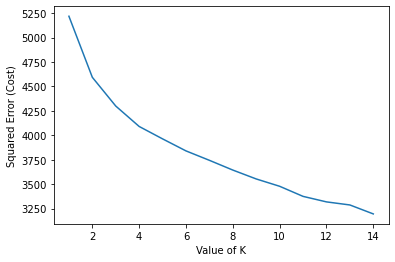

In [84]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

x_minmax = MinMaxScaler().fit_transform(x)

cost = []
for i in range(1,15):
    KM = KMeans(n_clusters = i,max_iter = 500)
    KM.fit(x_minmax)
    
    # calculates squared error for the clustered points
    cost.append(KM.inertia_)  
    
    # KM.inertia_ : Sum of squared distances of samples to their closest cluster center, 
    #                   weighted by the sample weights if provided.
    
    # plot the cost against K values
plt.plot(range(1,15), cost)
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show()


kmeans = KMeans(n_clusters = 4,random_state=42).fit(x_minmax)
kmeans_comp = pd.DataFrame(kmeans.labels_,columns=["kmeans"])


# kmeans_comp.corrwith(train["price_range"])

Holdout - MinMax Data
0.9318181818181818


c:\Users\raulp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


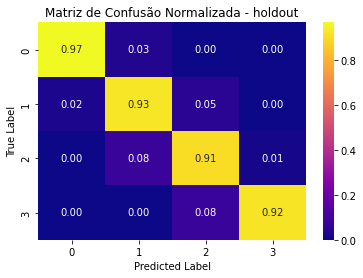

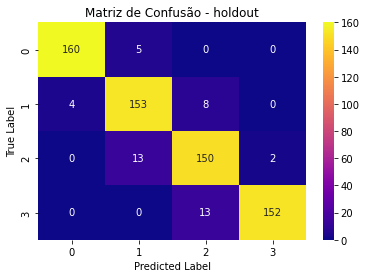

Accuracy: 0.9318181818181818
F1 Score: 0.9322984654743643
Precision: 0.9336381419179879
Recall: 0.9318181818181818
Specificity: 0.9318181818181818
Normalized Confusion Matrix:
 [[0.96969697 0.03030303 0.         0.        ]
 [0.02424242 0.92727273 0.04848485 0.        ]
 [0.         0.07878788 0.90909091 0.01212121]
 [0.         0.         0.07878788 0.92121212]]
Accuracy: 93.18%
F1 Score: 93.23%
Precision: 93.36%
Recall: 93.18%
Cross Validation - Normalized Data


c:\Users\raulp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


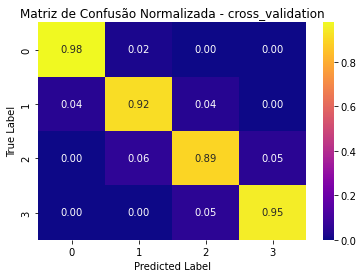

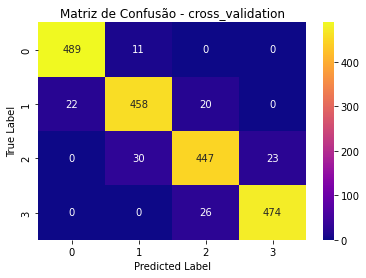

Accuracy: 0.934
F1 Score: 0.9338576599596663
Precision: 0.9337997199352175
Recall: 0.934
Specificity: 0.934
Normalized Confusion Matrix:
 [[0.978 0.022 0.    0.   ]
 [0.044 0.916 0.04  0.   ]
 [0.    0.06  0.894 0.046]
 [0.    0.    0.052 0.948]]
Accuracy: 93.40%
F1 Score: 93.39%
Precision: 93.38%
Recall: 93.40%
Holdout - Z-Score Data
0.9318181818181818


c:\Users\raulp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


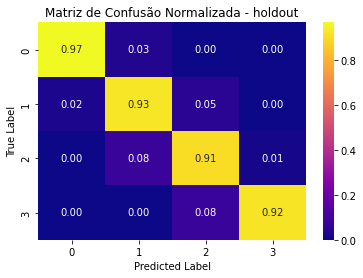

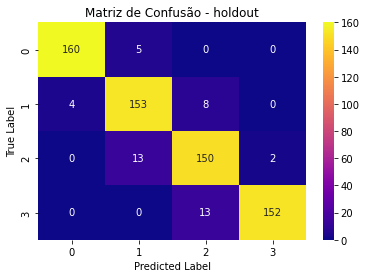

Accuracy: 0.9318181818181818
F1 Score: 0.9322984654743643
Precision: 0.9336381419179879
Recall: 0.9318181818181818
Specificity: 0.9318181818181818
Normalized Confusion Matrix:
 [[0.96969697 0.03030303 0.         0.        ]
 [0.02424242 0.92727273 0.04848485 0.        ]
 [0.         0.07878788 0.90909091 0.01212121]
 [0.         0.         0.07878788 0.92121212]]
Accuracy: 93.18%
F1 Score: 93.23%
Precision: 93.36%
Recall: 93.18%
Cross Validation - Normalized Data


c:\Users\raulp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


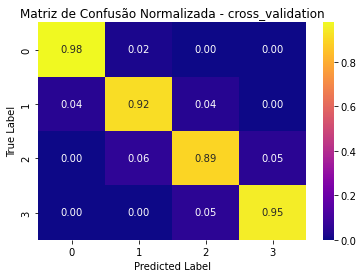

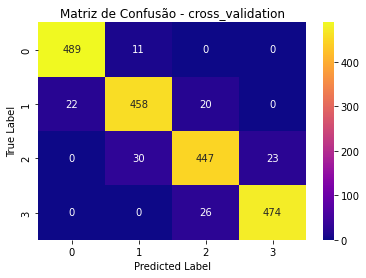

Accuracy: 0.934
F1 Score: 0.9338576599596663
Precision: 0.9337997199352175
Recall: 0.934
Specificity: 0.934
Normalized Confusion Matrix:
 [[0.978 0.022 0.    0.   ]
 [0.044 0.916 0.04  0.   ]
 [0.    0.06  0.894 0.046]
 [0.    0.    0.052 0.948]]
Accuracy: 93.40%
F1 Score: 93.39%
Precision: 93.38%
Recall: 93.40%


In [85]:

def calc_metrics(data, labels, type_split='holdout', show_normalized_cm=False, X=x, y=y):
    knn = KNeighborsClassifier(n_neighbors=21)  # Ajustar conforme necessário
    sk_folds = StratifiedKFold(n_splits=10)
    
    accuracy = 0
    f1 = 0
    precision = 0
    recall = 0
    specificity = 0
    
    if type_split == 'holdout':
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101, stratify=labels)
        knn.fit(x_train, y_train)
        predictions = knn.predict(x_test)
        print (knn.score(x_test, y_test))
    else:  # cross_validation
        predictions = cross_val_predict(knn, X, y, cv=sk_folds)
        x_test, y_test = data, labels  # Para uniformizar as métricas

    conf_matrix = confusion_matrix(y_test, predictions)

    # Métricas
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    specificity = recall_score(y_test, predictions, average='weighted', pos_label=0)
    
    if show_normalized_cm:
        cm_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='plasma')
        plt.title('Matriz de Confusão Normalizada - ' + type_split)   
    else:
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='plasma')
        plt.title('Matriz de Confusão - ' + type_split)   
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    if not show_normalized_cm:
        cm_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='plasma')
        plt.title('Matriz de Confusão Normalizada - ' + type_split)   
    else:
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='plasma')
        plt.title('Matriz de Confusão - ' + type_split)   
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    print('Accuracy:', accuracy)
    print('F1 Score:', f1)
    print('Precision:', precision)
    print('Recall:', recall)
    print('Specificity:', specificity)
    
    if show_normalized_cm:
        cm_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix:\n", cm_normalized)
    else:
        print("Confusion Matrix:\n", conf_matrix)

    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"F1 Score: {f1*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall: {recall*100:.2f}%")

# Uso exemplo
# data = normalized_zscore  # Supondo que essa seja sua matriz de dados normalizada
data = normalized_minmax
labels = y  # Supondo que esses sejam seus rótulos

print('Holdout - MinMax Data')
calc_metrics(data, labels, 'holdout', show_normalized_cm=True)
print('Cross Validation - Normalized Data')
calc_metrics(data, labels, 'cross_validation', show_normalized_cm=True)

data = normalized_zscore
print('Holdout - Z-Score Data')
calc_metrics(data, labels, 'holdout', show_normalized_cm=True)
print('Cross Validation - Normalized Data')
calc_metrics(data, labels, 'cross_validation', show_normalized_cm=True)



TypeError: Invalid shape () for image data

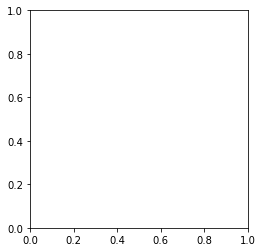

In [86]:

# Inicialize listas para armazenar as métricas durante a Cross-Validation
acc_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []
conf_matrices = []

# Normalize the data
x_minmax = MinMaxScaler().fit_transform(x)

# Cross-Validation Loop
for train_index, test_index in sk_folds.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    conf_matrices.append(cm)
    
    # Compute accuracy, F1 score, precision, recall (sensitivity), and specificity
    acc = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    precision = np.diag(cm) / np.sum(cm, axis=0)
    recall = np.diag(cm) / np.sum(cm, axis=1)
    specificity = [np.sum(np.delete(np.delete(cm, i, 0), i, 1)) / (np.sum(np.delete(cm, i, 0))) for i in range(len(cm))]
    
    acc_scores.append(acc)
    f1_scores.append(f1)
    precision_scores.append(np.mean(precision))
    recall_scores.append(np.mean(recall))
    specificity_scores.append(np.mean(specificity))

# Average the Cross-Validation scores
average_accuracy_cv = np.mean(acc_scores)
average_f1_score_cv = np.mean(f1_scores)
average_precision_cv = np.mean(precision_scores)
average_recall_cv = np.mean(recall_scores)
average_specificity_cv = np.mean(specificity_scores)

# Fit the model without cross-validation (Holdout)
knn.fit(x, y)
y_pred = knn.predict(x)

# Compute confusion matrix for the entire dataset
cm_holdout = confusion_matrix(y, y_pred)

# Compute metrics for Holdout
acc_holdout = accuracy_score(y, y_pred)
f1_holdout = f1_score(y, y_pred, average='weighted')
precision_holdout = np.diag(cm_holdout) / np.sum(cm_holdout, axis=0)
recall_holdout = np.diag(cm_holdout) / np.sum(cm_holdout, axis=1)
specificity_holdout = [np.sum(np.delete(np.delete(cm_holdout, i, 0), i, 1)) / (np.sum(np.delete(cm_holdout, i, 0))) for i in range(len(cm_holdout))]

# Função para plotar a matriz de confusão
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    

# Plot matriz de confusão normalizada para Cross-Validation
plot_confusion_matrix(np.sum(conf_matrices, axis=0), classes=[0, 1, 2, 3], normalize=True, title='Normalized confusion matrix CV')
plt.show()

# Plot matriz de confusão normalizada para Holdout
plot_confusion_matrix(cm_holdout, classes=[0, 1, 2, 3], normalize=True, title='Normalized confusion matrix Holdout')
plt.show()

# Print the Cross-Validation results
print(f"Cross-Validation Average Accuracy: {average_accuracy_cv*100:.2f}%")
print(f"Cross-Validation Average F1 Score: {average_f1_score_cv*100:.2f}%")
print(f"Cross-Validation Average Precision: {average_precision_cv*100:.2f}%")
print(f"Cross-Validation Average Recall: {average_recall_cv*100:.2f}%")
print(f"Cross-Validation Average Specificity: {average_specificity_cv*100:.2f}%")

# Print the Holdout results
print(f"Holdout Accuracy: {acc_holdout*100:.2f}%")
print(f"Holdout F1 Score: {f1_holdout*100:.2f}%")
print(f"Holdout Precision: {np.mean(precision_holdout)*100:.2f}%")
print(f"Holdout Recall: {np.mean(recall_holdout)*100:.2f}%")
print(f"Holdout Specificity: {np.mean(specificity_holdout)*100:.2f}%")
